# Polynomial Regression

Polynomial regression is a type of regression analysis used when the relationship between the independent variable 𝑥 and the dependent variable 𝑦 is modeled as an 𝑛-th degree polynomial. It is an extension of simple linear regression and can be useful when the data shows a curvilinear trend.

## Steps in PR

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# This will suppress all warnings
import warnings
warnings.filterwarnings('ignore')  

### Load the data

In [5]:
data=pd.read_csv('data/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Data Preprocessing

In [7]:
data.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [9]:
data.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [11]:
data.shape

(10, 3)

In [13]:
data.size

30

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [17]:
data.describe

<bound method NDFrame.describe of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [19]:
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [21]:
data.duplicated().sum()

0

### Correlation Analysis

In [35]:
correlation_matrix = data[['Level', 'Salary']].corr()
correlation_matrix

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


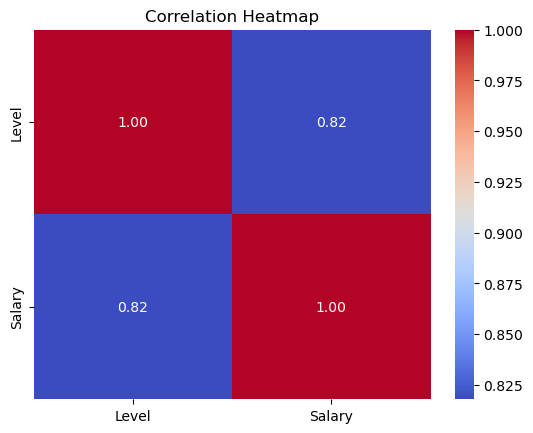

In [39]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Visualization

Text(0, 0.5, 'Salary')

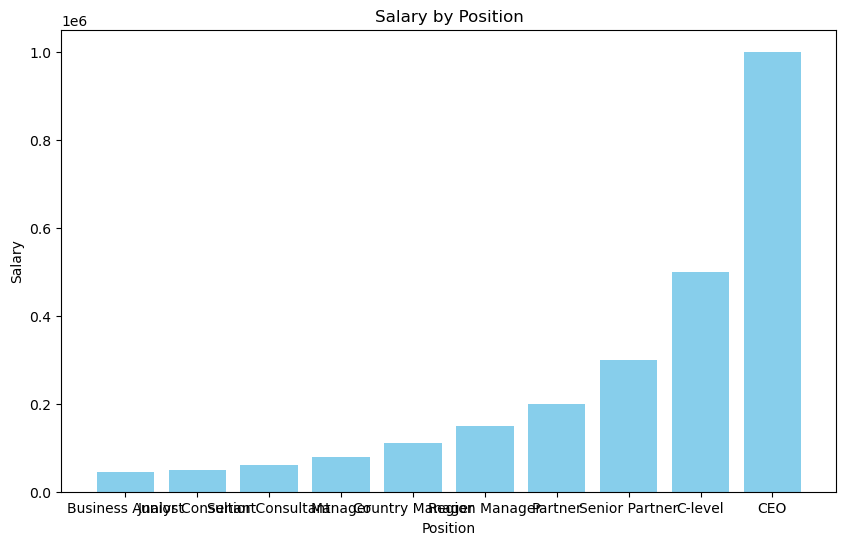

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(data['Position'], data['Salary'], color='skyblue')
plt.title('Salary by Position')
plt.xlabel('Position')
plt.ylabel('Salary')

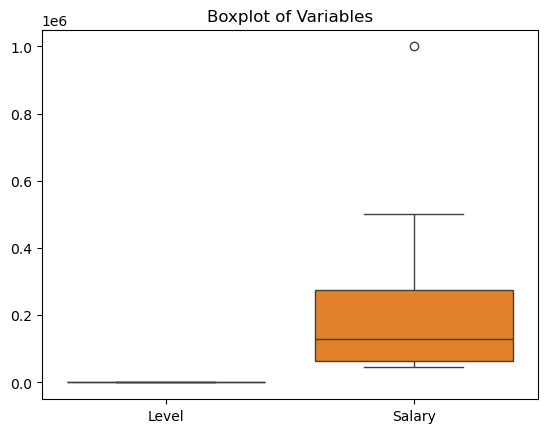

In [47]:
# sns.boxplot(x='Level', y='Salary', data=data)
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

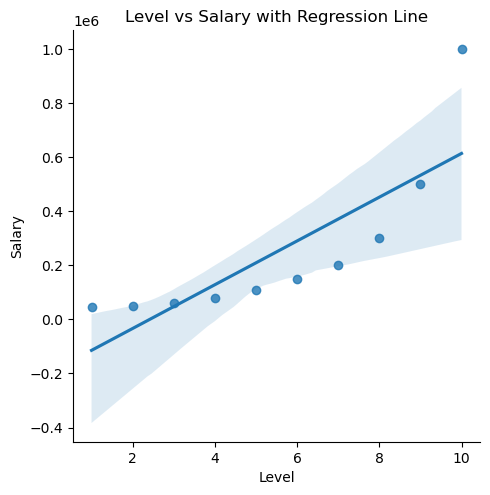

In [29]:
sns.lmplot(x='Level', y='Salary', data=data)
plt.title('Level vs Salary with Regression Line')
plt.show()

The graph above shows a curve (a parabola), which indicates that the relationship between the independent variable 𝑥 and the dependent variable 𝑦 is not linear. This suggests that a polynomial regression model is more appropriate for modeling this data. In polynomial regression, the relationship between the variables is represented by a polynomial equation rather than a straight line.

### Splitting the Data into Input(X) & Target(Y) variables

In [95]:
# X=data['Level'].values
# Y=data['Salary']

X=data.iloc[:,-2:-1].values
Y=data.iloc[:,-1].values

### Polynomial Featuring

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [65]:
pr=PolynomialFeatures(degree=5)
x_poly=pr.fit_transform(X)

### Linear Regression Modeling

In [79]:
lr=LinearRegression()
lr.fit(x_poly,Y)

LinearRegression()

### Predictions

In [81]:
y_pred=lr.predict(x_poly)
y_pred

array([ 43895.1048956 ,  53836.82983705,  57065.26806523,  77286.71328647,
       112263.40326306, 152736.59673623, 201349.65034936, 291571.09557096,
       506617.71561785, 998377.62237821])

### Model Coefficients and Intercept

In [83]:
print("Coefficient:",lr.coef_) #m
print("Intercept:",lr.intercept_) #C

Coefficient: [ 0.00000000e+00  1.60731002e+05 -1.00378788e+05  2.81649184e+04
 -3.44638695e+03  1.57692308e+02]
Intercept: -41333.33333268855


### Visualization of Actual & Predicted Values

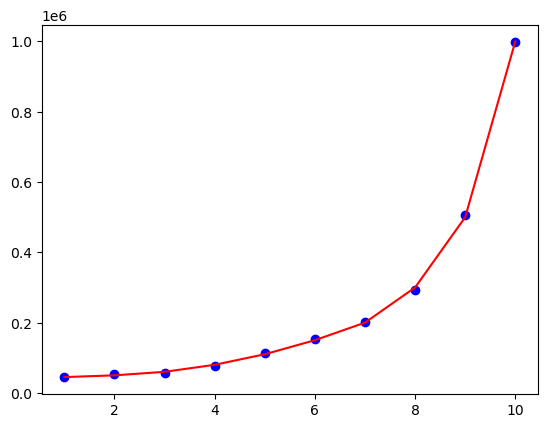

In [85]:
plt.plot(X,Y,color='red')
plt.scatter(X,y_pred,color='blue')

### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [155]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(Y,y_pred))
print(mean_squared_error(Y,y_pred))
print(np.sqrt(mean_squared_error(Y,y_pred)))

3360.8391607084804
16382284.382283146
4047.5034752651104


### Creating DataFrame to view Results

In [87]:
Results=pd.DataFrame(columns=['Actual_Salary','Predicted_Salary'])
Results['Actual_Salary']=Y
Results['Predicted_Salary']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual_Salary,Predicted_Salary,Id
0,0,45000,43895.104896,0
1,1,50000,53836.829837,1
2,2,60000,57065.268065,2
3,3,80000,77286.713286,3
4,4,110000,112263.403263,4


### r2 value calculations

In [91]:
from sklearn.metrics import r2_score
r2=r2_score(Y,y_pred)
r2

0.9997969027099755

### Conclusion

The R² value is 0.9998, which is extremely close to 1. This indicates that the polynomial regression model explains 99.98% of the variability in the salary data. This is a very strong fit, suggesting that the model is highly effective in predicting the salaries based on the independent variables in your data.
An R² value this high implies that the polynomial model captures nearly all the patterns in the data, with very little unexplained variance. Therefore, the model appears to be a very good predictor for salaries.


The differences between the predicted and actual values are very small, indicating that the model provides a highly accurate prediction, with minimal error.

The model is highly effective and can be considered reliable for predicting salaries. However, it is always important to validate the model on additional data (if available) to ensure its generalizability beyond this particular dataset.

In [149]:
# END